<a href="https://colab.research.google.com/github/nicholasfurl/Great-Courses/blob/main/Lesson08_nearestNeighbor_comfort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This notebook builds a classifier for comfortable climate based on relative humidity and temperature. 
#The classifiers we will use are decision trees and k-nearest neighbors.

In [ ]:
#I'm compromising ... I'll put this here for references purposes 
#or if something in a function needs a global import
#But I won't run (at first) and will try to link imports to the functions
#that need them where I can

import random
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns   #based on matplot, meant for stats viz https://seaborn.pydata.org/. Will look forward to learning this!
import math
import graphviz 

In [1]:
#aboveline computes a slope and intersept based on variables x1 and x2. 
#It then returns True if x3[1] is above the line defined by this slope and intercept.

#Only the function definition
def aboveline(x1,x2,x3):

#Literally a slope, ratio of the transition between the points on one variable and the points on another
#Odd, though, because transitions are between variables x1 and x2 rather than within a variable (where I would expect the "variability")
#   x[1] = m * x[0] + b
#   need to pick m and b so x1 and x2 are hit
    m = (x2[1] - x1[1])/(x2[0] - x1[0])

#Uses formula for a line to get b when x1[0], m and X1[1] are known
#    b = x1[1] * (x2[0] - x1[0]) - (x2[1] - x1[1]) * x1[0]
    b = x1[1] - m * x1[0]
#    slope2 = (x3[1] - x1[1])/(x3[0]-x1[0])

    #I think he means if x3[1] is higher than predicted by the line from x3[0]
    return(x3[1] > m * x3[0] + b)

In [2]:
#comfort calculates if the temperature, relative humidity combination is comfortable
#how?

#Looks like this might return true or false depending on whether temperature (temp) and relative himidity (rh) fall within a comfort zone or not
def comfort(temp,rh):
#    rh,  temp
#    86.5,67.1
#    29.3,69.0
# from https://www.azosensors.com/article.aspx?ArticleID=487


#ok so we have two pairs of values and we test if the change across temp and rh exceeds that predicted by the m and b defined by the two pairs.
#We do this twice and test if rh and tmp is above both of these predictions.
#Then we have two more such pairs of values. And we do pairs like those twice but now we don't want the prediction of x3[1] from x3[0] to exceed those predictions
#Looks like there's a romboid shaped comfort zone on the plot between temperature and humidity.
#The line segments of the shape are oriented and so can be treated as lines with the points and the edges used to define the slopes.
#We can then compute if a given temperature / humidity pair falls in between those lines or not

    return(
         aboveline([86.5,67.1],[29.3,69.0],[rh,temp]) and
         aboveline([29.3,69.0],[23.0,76.0],[rh,temp]) and
         not aboveline([23.0,76.0],[58.3,74.3],[rh,temp]) and
         not aboveline([58.3,74.3],[86.5,67.1],[rh,temp]))

In [24]:
#we will create 500 random temperature relative humidity combinatons.
#We will create training and test sets from them

#OK, time to use one of these pandas dataframes.
#It's basically a table with column labels

import pandas as pd

N = 10500

#Create dataframe by loading in columns labels and a number of rows as arguments
#Looks it iy is filled with NaNs at first
all_dat = pd.DataFrame(columns=['temp (F)', 'relative humidity'], index=range(N))
print(all_dat)

#Looks like this runs with numpy but doesn't need "import random"
import numpy as np



#Looks like this produces a list of N random numbers taken from uniform distribution bounded by 65 and 77
#And assigns it to the temp col of pandas array
all_dat['temp (F)'] = np.random.uniform(65, 77, N)
print(all_dat)

#test = np.random.uniform(65, 77, N)
#print(test)

#do the same, but for humidity col instead
all_dat['relative humidity'] = np.random.uniform(15,90, N)
print(all_dat)

#So the .loc method indexes the pandas array
#So it takes every (ith) row, submits the temp / rh pair to comfort to get the True/False comfirt value
#then it - creates a new column for the comfort values using series? (WE didn't need series when assigning cols of random nums ...)
all_dat['labs'] = pd.Series([comfort(all_dat['temp (F)'].loc[i], all_dat['relative humidity'].loc[i]) for i in range(N)])
print(all_dat)

#This works by itself? Yes, it returns a bunch of Trues and Falses as expected
#test1 = [comfort(all_dat['temp (F)'].loc[i], all_dat['relative humidity'].loc[i]) for i in range(N)]
#print(test1)

#How does this work with pandas?
#This returns a new DataFrame, but including just the columns with names used to index all_dat
#test2 = all_dat[['temp (F)', 'relative humidity']]
#print(test2)

#So get the temp and rh columsn of all_dat in one DataFrame and the labs in anothe DataFrame and 
#pass both DataFrames to train_test_split. Test_size seems to use 10,000 of its 10,500 items for some reason.
#dat, test_dat are DataFrames and labs and test_labs are series. I think series are to DataFrames as vectors are to matrices.
#the input all_dat was a pandas DataFrame so that's why it looks like 
from sklearn.model_selection import train_test_split  #we can't put all of sklearn in path? we have to import everything separately?
dat, test_dat, labs, test_labs = train_test_split(all_dat[['temp (F)', 'relative humidity']],
                                                  all_dat['labs'], test_size=10000)


      temp (F) relative humidity
0          NaN               NaN
1          NaN               NaN
2          NaN               NaN
3          NaN               NaN
4          NaN               NaN
...        ...               ...
10495      NaN               NaN
10496      NaN               NaN
10497      NaN               NaN
10498      NaN               NaN
10499      NaN               NaN

[10500 rows x 2 columns]
        temp (F) relative humidity
0      71.715287               NaN
1      66.609524               NaN
2      67.990298               NaN
3      70.501493               NaN
4      66.419717               NaN
...          ...               ...
10495  76.576554               NaN
10496  65.920877               NaN
10497  73.496618               NaN
10498  69.736666               NaN
10499  74.975015               NaN

[10500 rows x 2 columns]
        temp (F)  relative humidity
0      71.715287          82.715008
1      66.609524          24.294701
2      67.990298        

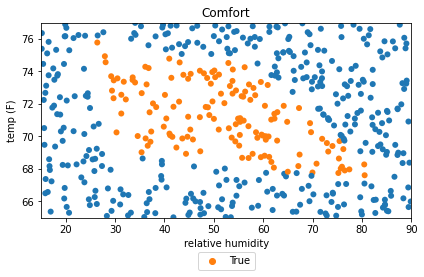

In [42]:
#Make a plot of the comfort zone. Should be a reconstricted version of the one in the linked article

# Plot

import seaborn as sns   #based on matplot, meant for stats viz https://seaborn.pydata.org/. Will look forward to learning this!

#So scatterplot function - useful for me!
#https://seaborn.pydata.org/generated/seaborn.scatterplot.html
#I guess these arguments can go in in any order so long as they are specified by data =  etc
#So dat are the training data (temp & rh) and labs are the test labels (True, False)
#They are concatenated into a larger DataFrame and passed in as data
#I guess the x and y arguments both specify which column to use for what and probably default to become the axis labels
#Again, the hue property probably refers to the column header in data.
#Linewidth = 0 probably means no line
ax = sns.scatterplot(x='relative humidity', y='temp (F)', hue='labs', data=pd.concat([dat, labs], axis=1), linewidth=0, marker='o')

#So we have subplot handels as in matlab
h,l = ax.get_legend_handles_labels()

#So I can create the scatterplot by importing seaborn alone but if I want to modify anything about it, then I need to import matplotlib too
import matplotlib.pyplot as plt

#The below is similar to matlab
plt.ylim(65,77)
plt.xlim(15,90)

#Why do we need h and l both and why index 1?
#Looks like legend moved to bottom center of graph (at [50,-.15] in fact!) and the false entry dropped off
plt.legend(h[1:], l[1:], bbox_to_anchor=(0.5, -0.15), loc="upper center", ncol=2) 

plt.title('Comfort')
plt.tight_layout()

In [37]:
#Skip ... just doing some exploration

#So if it's a series then it has a name:Labs field printed at the bottom instead of a Labs column header as with a DataFrame
#But when you concatenate a series to a DataFrame, it adds the series as a new column and moves the name field to become a columns header
#in the new output DataFrame

print(dat)
print(labs)
print(pd.concat([dat, labs], axis=1))
labs

#What are the two items in each of these lists? It's the second one (index=1) that seems relevant
print(h[1])  #must be the proper handle
print(l)  #[False, True]?


        temp (F)  relative humidity   labs
5663   72.761984          56.354781   True
6020   72.143767          42.973219   True
8151   69.068032          73.178441   True
10215  69.505188          83.745194  False
1728   65.132225          32.632727  False
...          ...                ...    ...
9113   73.077589          71.098953  False
6294   71.574556          85.074243  False
6258   65.350288          71.595963  False
9137   70.301068          77.660953  False
5535   73.323910          34.058302   True

[500 rows x 3 columns]
['False', 'True']
